Example of Underfitting (Degree 1):


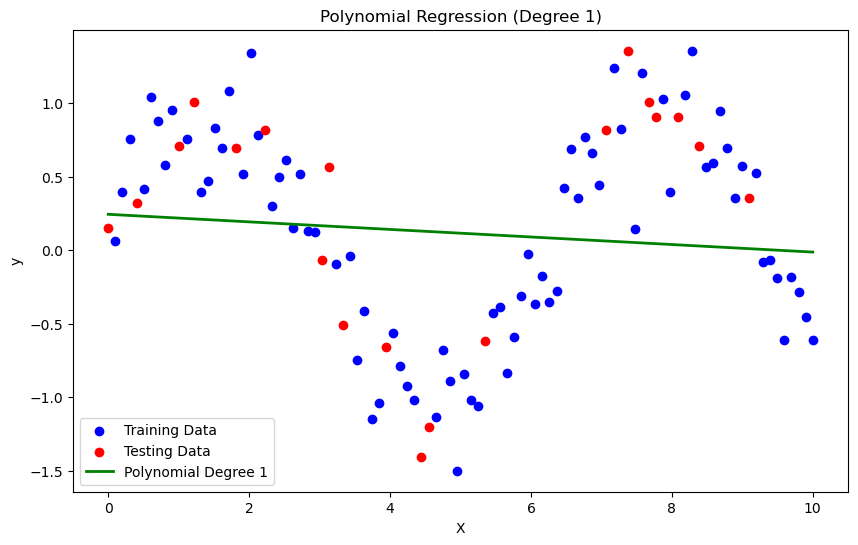

Degree 1 - Training Error: 0.4852, Testing Error: 0.6388

Example of Good Fit (Degree 4):


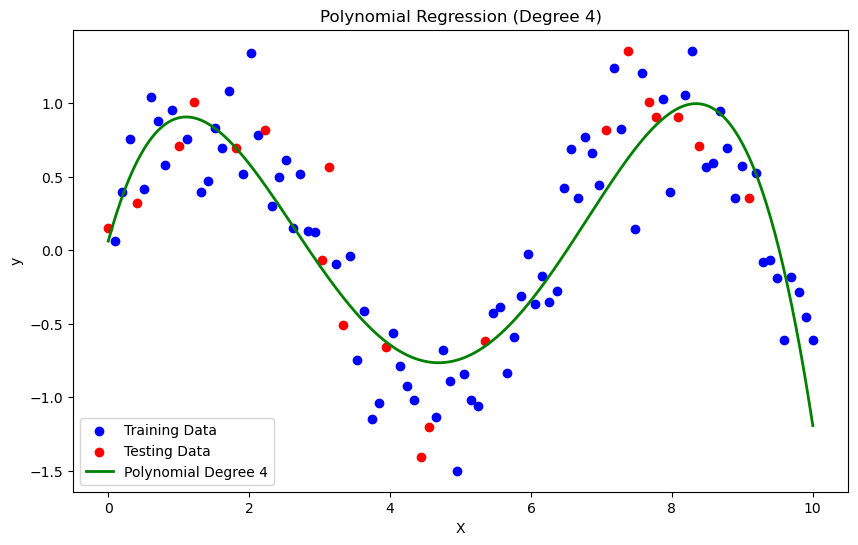

Degree 4 - Training Error: 0.1114, Testing Error: 0.1214

Example of Overfitting (Degree 15):


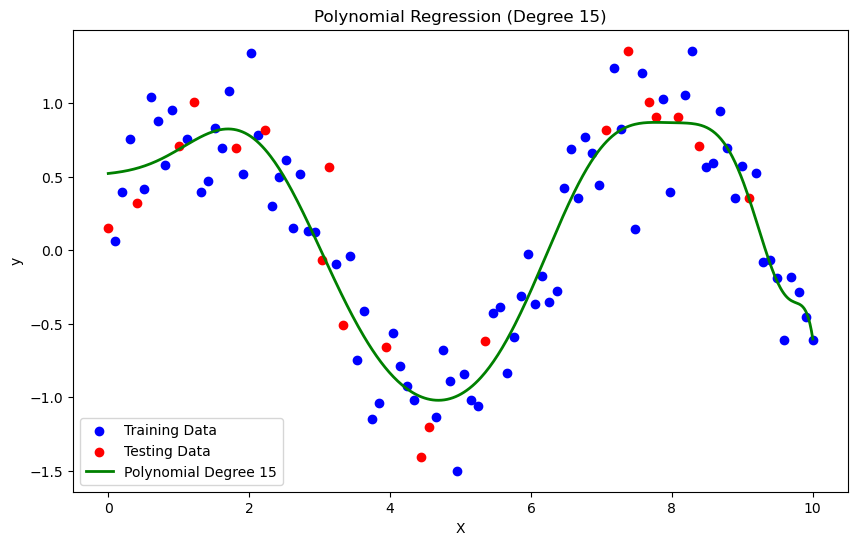

Degree 15 - Training Error: 0.0697, Testing Error: 0.0694


In [1]:
#Underfitting and Overfitting in Polynomial Regression
#Sourabh Vamdevan year 2020
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)  
y = np.sin(X).ravel() + np.random.normal(scale=0.3, size=X.shape[0])  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


def plot_overfitting(degree):
    
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

   
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predictions will be used to calkulate the scores and plot the results
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    
    X_plot = np.linspace(0, 10, 500).reshape(-1, 1)  #This is for smooth curve plotting
    X_plot_poly = poly.transform(X_plot)
    y_plot = model.predict(X_plot_poly)

    plt.figure(figsize=(10, 6))
    plt.scatter(X_train, y_train, color='blue', label='Training Data')
    plt.scatter(X_test, y_test, color='red', label='Testing Data')
    plt.plot(X_plot, y_plot, color='green', label=f'Polynomial Degree {degree}', linewidth=2)
    plt.title(f"Polynomial Regression (Degree {degree})")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.show()

    print(f"Degree {degree} - Training Error: {train_error:.4f}, Testing Error: {test_error:.4f}")

#Below codes represents testing with different degrees of polynomial regression
print("Example of Underfitting (Degree 1):")
plot_overfitting(degree=1)

print("\nExample of Good Fit (Degree 4):")
plot_overfitting(degree=4)

print("\nExample of Overfitting (Degree 15):")
plot_overfitting(degree=15)
